In [ ]:
# Compute the best approximation to the function

# Flow
## Input n
## Define the function to approximate
## Define the polynomial function
## Define the Basis
## Evaluate the integrals and find b matrix
## Form the matrix Ax = b and solve for x

In [ ]:
import math
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Input n
n = int(input("Enter n: "))

Enter n: 3


In [ ]:
# Define the function to approximate
def f(x):
  return math.sin(x)

In [ ]:
f(math.radians(90))

1.0

In [ ]:
# Define Base Function
def base_fn_gen(p):
  base_fn = lambda x: x**p
  return base_fn

In [ ]:
def generate_current_function(p):
  return base_fn_gen(p) * f

In [ ]:
basis = []
for i in range(n):
  basis.append(base_fn_gen(i))

In [ ]:
# Define lower and upper limits
lowerlim = 0
upperlim = math.pi

In [ ]:
h1 = lambda x: x**4
h2 = lambda x: x + 2
h3 = lambda x, y: x*y
h3(h1(2), h2(3))

80

In [ ]:
current_f_term = lambda p: lambda x: x**p * math.sin(x)
current_f_term(0)(400)

current_A_ij_term = lambda i, j: lambda x: x**(i + j)


In [ ]:
# Evaluate b vector
b = np.zeros((n, 1))
error = np.zeros((n, 1))
# current_b_function = lambda x: 

for i in range(n):
  # current_function = generate_current_function(i)
  b[i], error[i] = integrate.quad(current_f_term(i), lowerlim, upperlim)

In [ ]:
# Evaluate A matrix
A = np.zeros((n, n))
for i in range(n):
  for j in range(n):
    A[i][j], temp = integrate.quad(current_A_ij_term(i, j), lowerlim, upperlim)

In [ ]:
A

array([[ 3.14159265,  4.9348022 , 10.33542556],
       [ 4.9348022 , 10.33542556, 24.35227276],
       [10.33542556, 24.35227276, 61.20393696]])

In [ ]:
coefficient_vector = np.linalg.solve(A, b)

In [ ]:
coefficient_vector

array([[-0.0504655 ],
       [ 1.3122362 ],
       [-0.41769776]])

[-0.4176977570064734, 1.312236204832473, -0.05046549777846224]

In [ ]:
f_approx_coefficients = list(reversed(coefficient_vector.flatten().tolist()))
# coefficient_vector.flatten()
f_approx = np.poly1d(f_approx_coefficients)

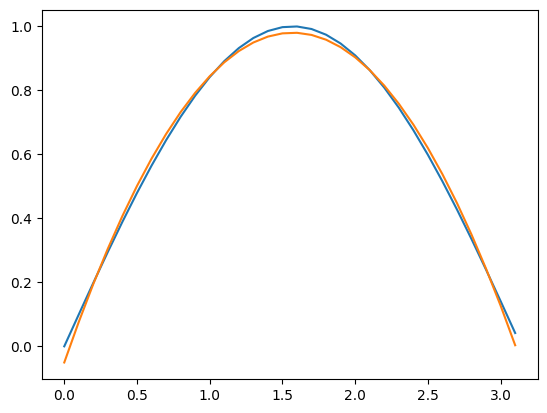

In [ ]:
# Plot sin x and f_approx
x = np.arange(0, np.pi,0.1)   # start,stop,step
f_plot = np.sin(x)
f_approx_plot = f_approx(x)
plt.plot(x, f_plot, x, f_approx_plot)
plt.show()